
# Analysis Data PFT Pilots

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color="#000000", linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [3]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [26]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(30,10))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 14)


## Load data participants

In [5]:
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_Choice_Pilot_All.csv') 

In [6]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[0 1 2 3]
Number of participants: 4


In [7]:
data_exp1.head()

,trial,leftId,rightId,Frame,endTime,choice,choiceTime,LRat1,RRat1,LRat2,RRat2,LVar1,RVar1,LVar2,RVar2,Part
0,0.0,21.0,4.0,2.0,7.508409,1.0,1.174838,50.0,28.5,1.5,20.5,0.000000,3.535534,0.707107,6.363961,0
1,1.0,12.0,14.0,2.0,7.513930,1.0,0.780269,40.5,27.5,10.0,23.0,0.707107,2.121320,5.656854,4.242641,0
2,2.0,20.0,19.0,2.0,7.515296,1.0,1.195317,50.0,8.0,1.0,41.0,0.000000,0.000000,0.000000,12.727922,0
3,3.0,2.0,8.0,2.0,7.514498,1.0,0.247736,44.5,10.5,1.0,50.0,3.535534,3.535534,0.000000,0.000000,0
4,4.0,4.0,21.0,1.0,7.514311,1.0,0.178482,28.5,50.0,20.5,1.5,3.535534,0.000000,6.363961,0.707107,0


## drop NaNs from choice rows

In [8]:
data_exp1 = data_exp1.dropna(axis = 0, how ='any') 

In [9]:
data_exp1 = data_exp1.reset_index()

In [10]:
data_exp1["TotVal"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )


# add z-scores

In [11]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")


In [12]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.Frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])) or (data_exp1.choice[i] == 0 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.Frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])) or (data_exp1.choice[i] == 0 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct"] = Correct

## Data visualization

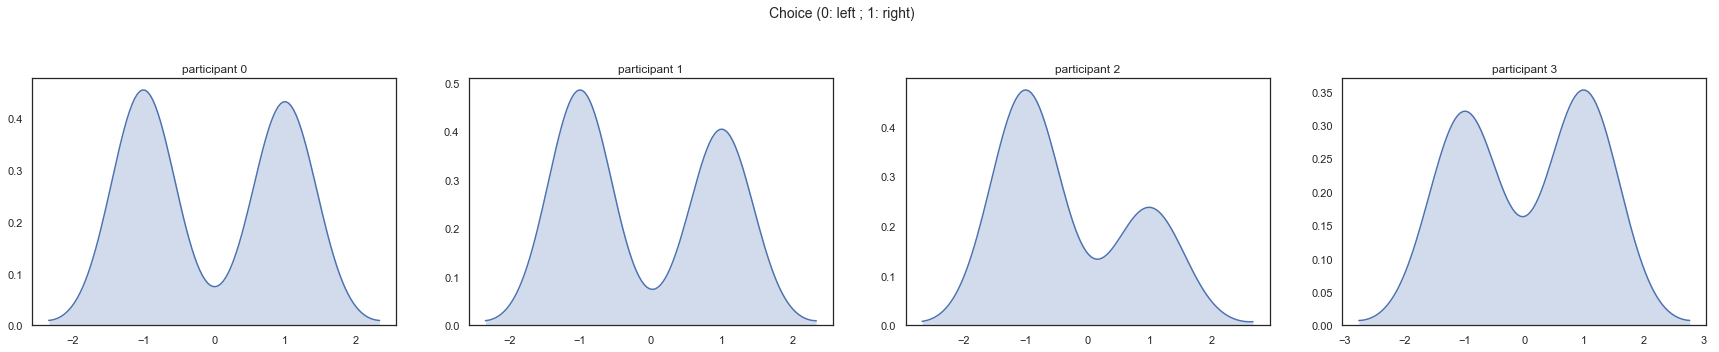

In [27]:
participant_densities(data_exp1,'choice', title = 'Choice (0: left ; 1: right)')

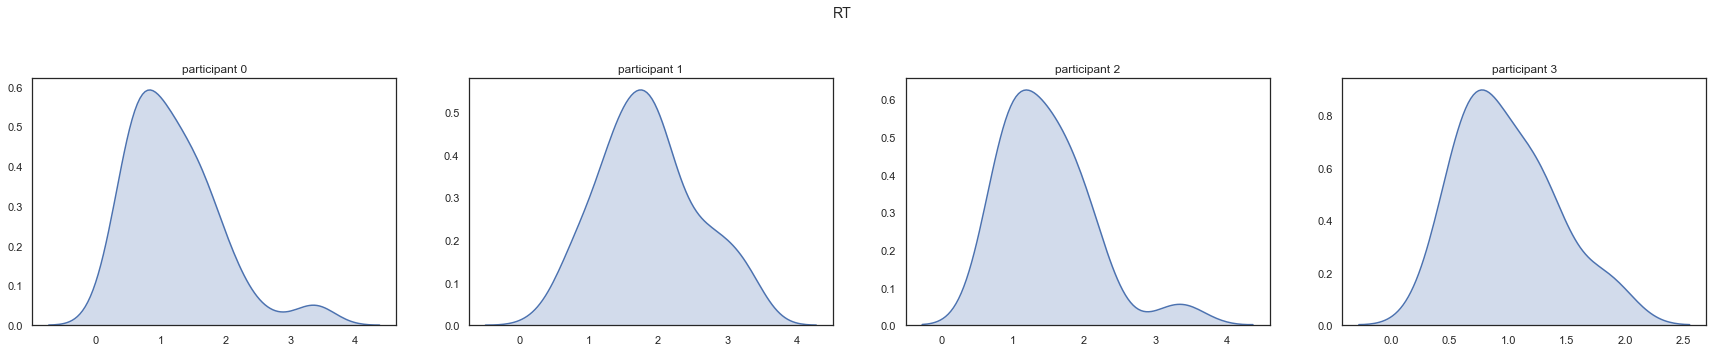

In [28]:
participant_densities(data_exp1,'choiceTime',title = 'RT')

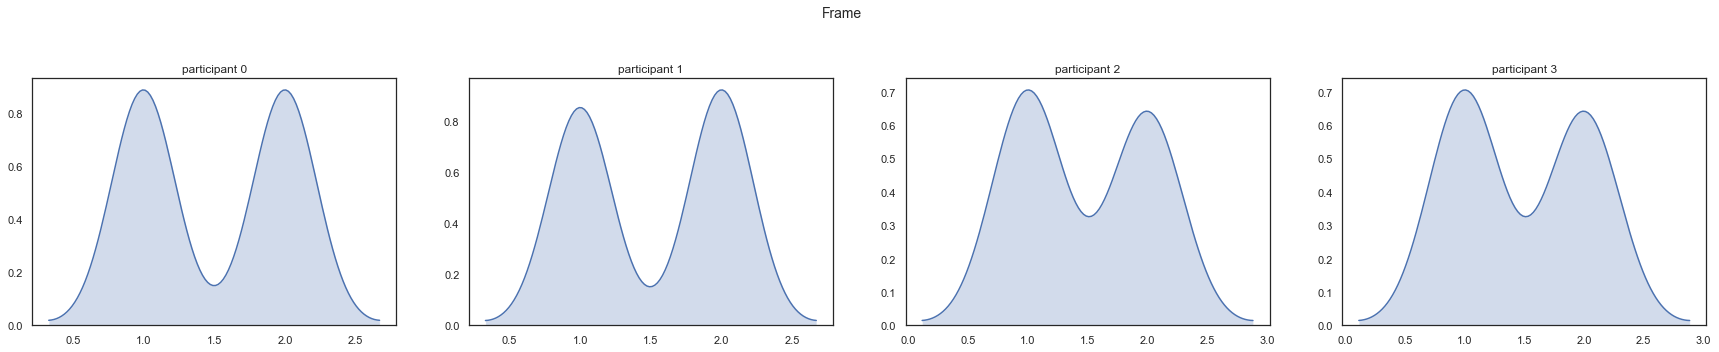

In [29]:
participant_densities(data_exp1,'Frame',title = 'Frame')

In [31]:
data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == 3)].correct.mean()

0.2

In [27]:
data_expL = data_exp1.loc[(data_exp1['Frame'] == 1) & (data_exp1['Part'] == 3)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == 3)] # 1 = Like, 2 = Dislike

Pearson's r = -0.31 p =  0.0


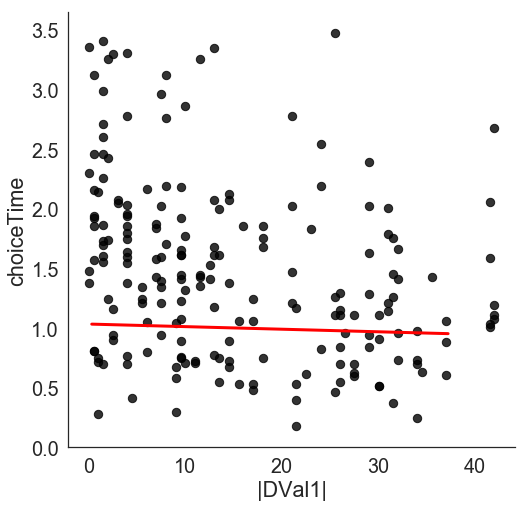

In [28]:
x_variable = 'absDVal1'
x_varlabel = '|DVal1|'
y_variable = 'choiceTime'
y_varlabel =  'choiceTime'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_exp1, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_exp1[x_variable], data_exp1[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


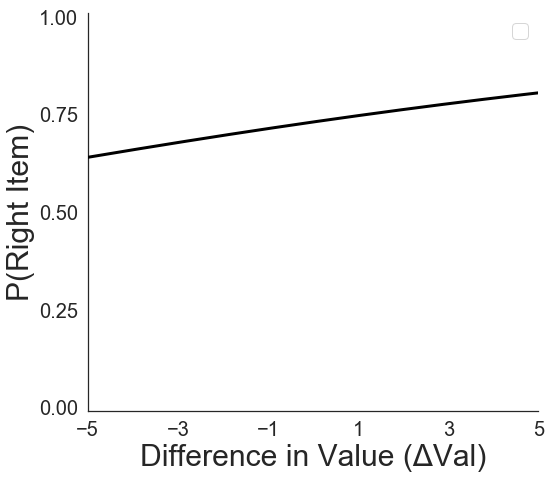

In [29]:
# Split by high/low conf
logisticplot_all( data=data_expL, xaxis='DVal1', yaxis='choice', ylab='P(Right Item)', xlab='Difference in Value (ΔVal)',
                 modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


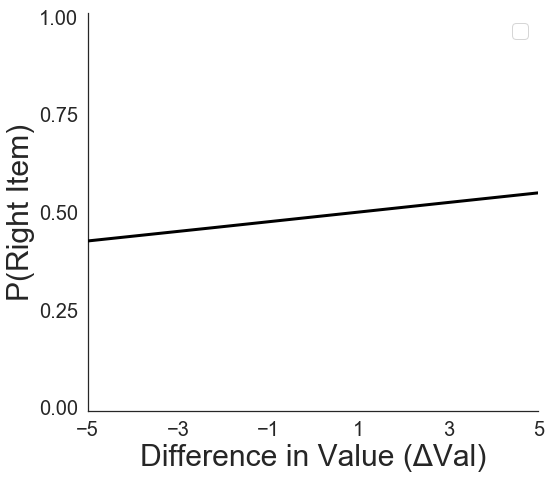

In [30]:
# Split by high/low conf
logisticplot_all( data=data_expD, xaxis='DVal1', yaxis='choice', ylab='P(Right Item)', xlab='Difference in Value (ΔVal)',
                 modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()